In [2]:
import pandas as pd

data = pd.read_csv("data-final.csv",delimiter='\t')


In [3]:

data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


(4659, 110)
(1933, 110)


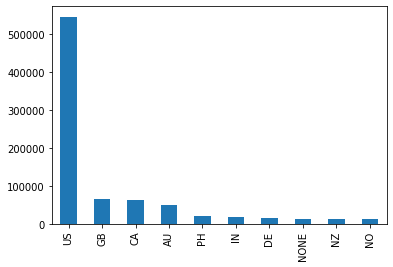

In [7]:
print(data[data["country"] == "PL"].shape)
print(data[data["country"] == "JP"].shape)
data["country"].value_counts().nlargest(10).plot.bar()





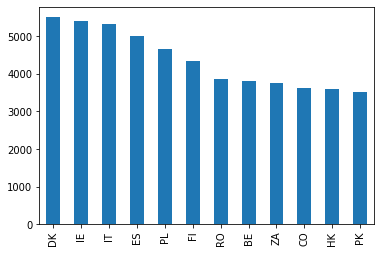

In [10]:
series = data["country"].value_counts()
between = data["country"].value_counts().between(3500,6000)
series[between].plot.bar()


In [14]:

data2 =  data.loc[:,'EXT1':'EST10'].join(data[['country']])
print(data2.shape)
data2.head()




(1015341, 21)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,KE


In [15]:
data3 = data2.loc[data2['country'].isin(['PH'])].sample(n=4659)
data4 = data2.loc[data2['country'].isin(['PL'])]
result = pd.concat([data3,data4])
print(result[result["country"] == "PL"].shape)
print(result[result["country"] == "PH"].shape)

(4659, 21)
(4659, 21)


In [16]:

print(result.isnull().values.sum())
print(result[result.isnull().any(axis=1)])

40
        EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
248570   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
263201   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   

        EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  country  
248570   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN       PH  
263201   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN       PL  

[2 rows x 21 columns]


In [17]:
result = result.dropna()
result.shape
print(result[result["country"] == "PL"].shape)
print(result[result["country"] == "PH"].shape)

(4658, 21)
(4658, 21)


In [18]:

X = result.drop('country',axis=1).values
y = result['country'].values
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)
print(y)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


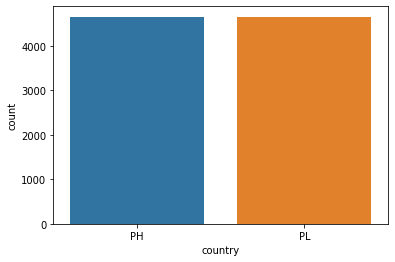

In [19]:
import seaborn as sns
sns.countplot(x='country', data = result)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[0.6 0.8 0.6 ... 0.6 0.8 0.4]
 [0.2 1.  0.6 ... 0.6 0.2 1. ]
 [0.2 0.2 0.6 ... 0.6 0.8 0.6]
 ...
 [0.6 0.4 0.8 ... 0.8 0.8 0.6]
 [0.8 0.8 0.8 ... 0.4 0.8 0.4]
 [0.6 1.  0.6 ... 0.2 0.6 0.2]]


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten
from tensorflow.keras.constraints import max_norm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

model = Sequential()





model.add(Dense(20,  activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.fit(x=X_train, 
          y=y_train, 
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test)
          )

Epoch 1/100
51/51 [==============================] - 0s 4ms/step - loss: 0.7195 - accuracy: 0.5114 - val_loss: 0.6933 - val_accuracy: 0.5116
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5051 - val_loss: 0.6928 - val_accuracy: 0.5113
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5035 - val_loss: 0.6926 - val_accuracy: 0.5106
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4950 - val_loss: 0.6928 - val_accuracy: 0.5045
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4970 - val_loss: 0.6923 - val_accuracy: 0.5066
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5047 - val_loss: 0.6919 - val_accuracy: 0.5352
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5301 - val_loss: 0.6893 - val_accuracy: 0.5571
Epoch 8/100
5

Epoch 59/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6047 - accuracy: 0.6861 - val_loss: 0.5711 - val_accuracy: 0.7224
Epoch 60/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6861 - val_loss: 0.5658 - val_accuracy: 0.7281
Epoch 61/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.6954 - val_loss: 0.5653 - val_accuracy: 0.7249
Epoch 62/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.6896 - val_loss: 0.5722 - val_accuracy: 0.7191
Epoch 63/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.6839 - val_loss: 0.5709 - val_accuracy: 0.7170
Epoch 64/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.6959 - val_loss: 0.5659 - val_accuracy: 0.7249
Epoch 65/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.6945 - val_loss: 0.5637 - val_accuracy: 0.7281
Epoch 

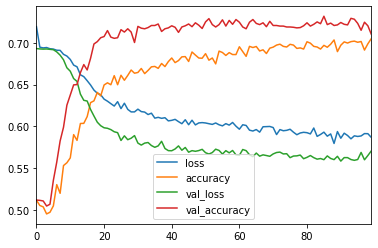

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1399
           1       0.67      0.81      0.74      1396

    accuracy                           0.71      2795
   macro avg       0.72      0.71      0.71      2795
weighted avg       0.72      0.71      0.71      2795



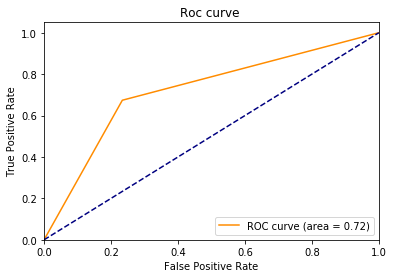

In [55]:
confusion_matrix(y_test,predictions)

fpr, tpr, thresholds = roc_curve(predictions, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve ')
plt.legend(loc="lower right")
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train.ravel())
predictions = logmodel.predict(X_test)

/home/piotr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1399
           1       0.67      0.66      0.67      1396

    accuracy                           0.67      2795
   macro avg       0.67      0.67      0.67      2795
weighted avg       0.67      0.67      0.67      2795



array([[942, 457],
       [472, 924]])

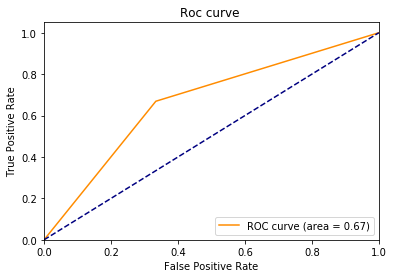

In [61]:
confusion_matrix(y_test,predictions)

fpr, tpr, thresholds = roc_curve(predictions, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve ')
plt.legend(loc="lower right")
plt.show()